# <center> <h1>  🚢   👨‍💻  🚢

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sn

In [2]:
data = pd.read_csv("Datasets/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()
# age column is incomplete
# Cabin column is incomplete
# Embarked column is incomplete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <center>  Let's try to populate NaN values

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 1. We will try to fill Embarked
data["Embarked"].unique()
# There were 3 boarding places on the Titanic
# S = Southampton
# C = cherbourg
# Q = Queenstown

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
sum(data["Embarked"]=="S")

644

In [8]:
sum(data["Embarked"]=="C")

168

In [9]:
sum(data["Embarked"]=="Q")

77

In [10]:
embarked_nan = data[(data["Embarked"]!="S") & (data["Embarked"]!="Q") & (data["Embarked"]!="C")]
embarked_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# If we consider that the ticket price depends on where they come from
# So if they bought a ticket for 80$, we can calculate the price of other passengers that are more than 75$ and less than 85$
# Depending on Embarked, we will absorb the most encountered of them into NaN values
data[(data["Fare"]>75) & (data["Fare"]<85)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C


In [12]:
sub_data1 = data[(data["Fare"]>75) & (data["Fare"]<85)]
sub_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C


In [13]:
sum(sub_data1["Embarked"]=="S")

13

In [14]:
sum(sub_data1["Embarked"]=="C")

16

In [15]:
sum(sub_data1["Embarked"]=="Q")

0

In [16]:
# So we have Embarked = C on 16 of the tickets purchased for about $80
# we also change our 2 nan values to Embarked = C
data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [17]:
data.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Cabin                                                B28
Embarked                                             NaN
Name: 829, dtype: object

In [18]:
data.loc[61, "Embarked"] = "C"
data.loc[829, "Embarked"] = "C"

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## <center> We will check whether there are any data entered incorrectly.

### <center> Now we will find Mrs, Miss, Ms in the Name column and check whether the Gender is entered correctly.

In [22]:
sub_data2 = data[["Name", "Sex"]]
sub_data2

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


In [23]:
sub_data2_list_index = []

for i in sub_data2.index:
    sub_data2_list_index.append(i)

# sub_data2_list_index

In [24]:
sub_data2_list_name = np.array(sub_data2["Name"])
# sub_data2_list_name

In [25]:
sub_data2_list_sex = np.array(sub_data2["Sex"])
# sub_data2_list_sex

In [26]:
s = []

for i in range(len(sub_data2_list_name)):
    s.append((sub_data2_list_index[i], sub_data2_list_name[i], sub_data2_list_sex[i]))

#s

In [27]:
a1=[]
a2=[]
a3=[]


for i in range(len(s)):
    if re.search(r"(Mrs|MRS|mrs|Miss|MISS|miss|MS|Ms|ms)", s[i][1]):
        a1.append((s[i][0]))
        a2.append(s[i][1])
        a3.append(s[i][2])

        

In [28]:
# a1

In [29]:
# a2

In [30]:
# a3

In [31]:
len(a1)

319

In [32]:
for i in range(len(a1)):
    for j in range(len(a1)):
        if a3[i]=="male":
            print(a2[i], " - ", a3[i])
            break
# If we pay attention, Williams has ms, this is what he found, but these are the correct ones.
# Now let's check the reverse of this case

Williams, Mr. Charles Eugene  -  male
Williams, Mr. Charles Duane  -  male
Williams, Mr. Howard Hugh "Harry"  -  male
Williams-Lambert, Mr. Fletcher Fellows  -  male
Adams, Mr. John  -  male
Daniel, Mr. Robert Williams  -  male
Hansen, Mr. Henry Damsgaard  -  male
Wilhelms, Mr. Charles  -  male
Williams, Mr. Leslie  -  male


In [33]:
a1=[]
a2=[]
a3=[]


for i in range(len(s)):
    if re.search(r"(Mr|MR)", s[i][1]):
        a1.append((s[i][0]))
        a2.append(s[i][1])
        a3.append(s[i][2])

In [34]:
# a1

In [35]:
# a2

In [36]:
# a3

In [37]:
len(a1)

647

In [38]:
for i in range(len(a1)):
    for j in range(len(a1)):
        if a3[i]=="female":
            print(a2[i], " - ", a3[i])
            break
# If we pay attention, there are those who have mr in the name, but they are women.
# So, if we conclude, there are no genders entered by mistake

Cumings, Mrs. John Bradley (Florence Briggs Thayer)  -  female
Futrelle, Mrs. Jacques Heath (Lily May Peel)  -  female
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  -  female
Nasser, Mrs. Nicholas (Adele Achem)  -  female
Hewlett, Mrs. (Mary D Kingcome)   -  female
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  -  female
Masselmani, Mrs. Fatima  -  female
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)  -  female
Spencer, Mrs. William Augustus (Marie Eugenie)  -  female
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  -  female
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)  -  female
Arnold-Franchi, Mrs. Josef (Josefine Franchi)  -  female
Harper, Mrs. Henry Sleeper (Myna Haxtun)  -  female
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)  -  female
Nye, Mrs. (Elizabeth Ramell)  -  female
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)  -  female
Doling, Mrs. John T (Ada Julia Bone)  -  female
Robins, Mrs. Alexander A (Grace Charity Laury)  

## <center> Now let's try to populate the NaN values in the Age column at least a little bit.

In [40]:
sub_data3 = data[["Name", "Sex", "Age"]]
sub_data3

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [41]:
sub_data3_list_index = []

for i in sub_data3.index:
    sub_data3_list_index.append(i)

# sub_data3_list_index

In [42]:
sub_data3_list_name = np.array(sub_data3["Name"])
# sub_data3_list_name

In [43]:
sub_data3_list_sex = np.array(sub_data3["Sex"])
# sub_data3_list_sex

In [46]:
sub_data3_list_age = np.array(sub_data3["Age"])
# sub_data3_list_age

In [47]:
s = []

for i in range(len(sub_data3_list_name)):
    s.append((sub_data3_list_index[i], sub_data3_list_name[i], sub_data3_list_sex[i], sub_data3_list_age[i]))

# s

In [48]:
s[10][1]

'Sandstrom, Miss. Marguerite Rut'

### <center> Demak Ismlar orasidan Mrs borlarni topamiz. Ya'ni turmushga chiqgan ayollarni. Keyin Ular orasidan NaN qiymatliklarni topamiz va NaN qiymati bo'lmagan usunlarning o'rtachasini yoki mediaanasini olib Age si NaN bo'lgan Ayollarga  o'zlashtiramiz

In [49]:
a1=[]
a2=[]
a3=[]
a4=[]

for i in range(len(s)):
    if re.search(r"(Mrs|MRS|mrs)", s[i][1]):
        a1.append((s[i][0]))
        a2.append(s[i][1])
        a3.append(s[i][2])
        a4.append(s[i][3])

In [50]:
# a1

In [51]:
# a2

In [52]:
# a3

In [53]:
# a4

In [54]:
sub_data4 = data.loc[a1]
sub_data4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [55]:
sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C


In [56]:
sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].notnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [57]:
age1 = np.array(sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].notnull())]["Age"])
age1

array([38., 35., 27., 14., 55., 31., 38., 40., 27., 18., 49., 29., 29.,
       33., 34., 47., 29., 24., 22., 40., 45., 32., 44., 24., 35., 24.,
       29., 41., 29., 50., 58., 41., 35., 19., 50., 17., 26., 24., 40.,
       22., 36., 31., 45., 60., 35., 24., 28., 34., 28., 28., 19., 42.,
       24., 45., 33., 23., 63., 35., 25., 33., 54., 34., 36., 44., 19.,
       48., 39., 36., 29., 53., 39., 39., 52., 24., 22., 39., 26., 41.,
       32., 40., 43., 18., 45., 24., 30., 48., 48., 36., 51., 57., 54.,
       43., 17., 31., 30., 31., 33., 52., 27., 62., 15., 44., 18., 45.,
       24., 48., 42., 47., 28., 56., 25., 39.])

In [58]:
np.min(age1)

14.0

In [59]:
np.max(age1)

63.0

In [60]:
np.mean(age1)

35.642857142857146

In [61]:
np.median(age1)

35.0

## <center> We fill the NaN values in Married Women with the median of Married Women.

In [62]:
index_1 = np.array(sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].isna())].index)
index_1

array([ 19,  31, 140, 166, 186, 256, 334, 347, 367, 375, 415, 431, 457,
       533, 578, 669, 849], dtype=int64)

In [63]:
for i in range(len(data)):
    
    if data.index[i] in index_1:
        
        data.loc[i,"Age"] = 35.0
        

In [64]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
data.loc[19]
# So we found the median from the Age of married women
# For married women with NaN in their age, we transformed them to the median
# We fixed the 17 NaN values in the Age column by doing this

PassengerId                         20
Survived                             1
Pclass                               3
Name           Masselmani, Mrs. Fatima
Sex                             female
Age                               35.0
SibSp                                0
Parch                                0
Ticket                            2649
Fare                             7.225
Cabin                              NaN
Embarked                             C
Name: 19, dtype: object

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          731 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# If we consider that the ticket price is related to age
# We will try to fill the ages through this

In [67]:
data[(data["Fare"]>0) & (data["Fare"]<=5) & (data["Embarked"]=="S")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


In [68]:
data[(data["Fare"]>0) & (data["Fare"]<=5) & (data["Embarked"]=="C")]
# 1 ta data bor ekan bilet narxi 4.01 ekan yoshi esa 20 ekan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C


In [69]:
data[(data["Fare"]>0) & (data["Fare"]<=5) & (data["Embarked"]=="Q")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [70]:
sub_data5_embarked_s = data[(data["Fare"]>5) & (data["Fare"]<=8) & (data["Embarked"]=="S")]
sub_data5_embarked_s

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [71]:
sum(sub_data5_embarked_s["Age"].isna())
# So from the passengers who leave Southampton and the ticket price is between $5 and $8
# 22 No age specified

22

In [72]:
sub_data5_embarked_s_1 = sub_data5_embarked_s[(sub_data5_embarked_s["Age"].notnull())]
sub_data5_embarked_s_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [73]:
sub_data5_embarked_s_1["Age"].mean()

28.072033898305083

In [74]:
sub_data5_embarked_s_1["Age"].median()

25.0

In [75]:
sub_data5_embarked_s_1["Age"].max()

74.0

In [76]:
sub_data5_embarked_s_1["Age"].min()

14.0

### <center> If you look at it, it would be a mistake to top it up, since the ticket price is between $5 and $8 and there are 14 and 74 year olds leaving Southampton, I think it's a mistake to try to top it up.

In [77]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> We will see how many people survived and how many died in total.

In [78]:
jinslar = data[(data["Sex"]=="male") | (data["Sex"]=="female")]["Survived"].value_counts()
jinslar

Survived
0    549
1    342
Name: count, dtype: int64

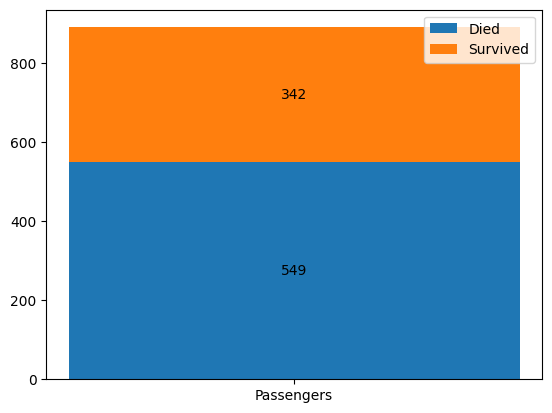

In [81]:
species = ("Passengers")
counts = {
    "Died": np.array([549]),
    "Survived" : np.array([342]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(1)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')


ax.legend()

plt.show()

In [82]:
(100/(549+342)) * 342
# survivors make up 38.4% of the total

38.38383838383839

In [83]:
(100/(549+342)) * 549
# while those killed make up 61.6% of the total

61.61616161616162

### <center> Qaysi jins vakillari ko'proq omon qolganligini ko'ramiz

In [84]:
man_survived = data[(data["Sex"]=="male")]["Survived"].value_counts()
man_survived

Survived
0    468
1    109
Name: count, dtype: int64

In [85]:
woman_survived = data[(data["Sex"]=="female")]["Survived"].value_counts()
woman_survived

Survived
1    233
0     81
Name: count, dtype: int64

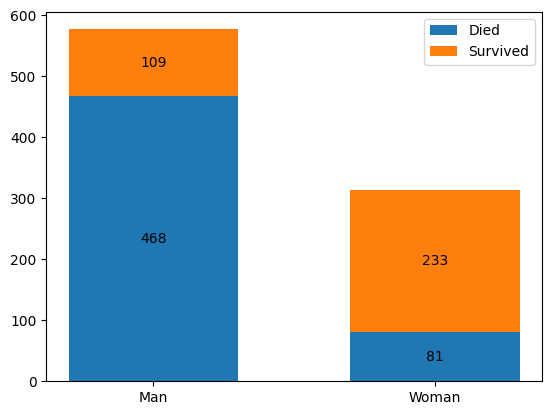

In [86]:
species = ("Man", "Woman")
counts = {
    "Died": np.array([468, 81]),
    "Survived" : np.array([109,233]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(2)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')


ax.legend()

plt.show()

In [87]:
(100/(468+109)) * 109
# 18.8 percent of the total males survived

18.890814558058928

In [88]:
(100/(81+233)) * 233
# Overall, 74.2 percent of women survived

74.20382165605095

In [89]:
(100/(549+342)) * 109
# 12.2% of the total passengers were male survivors

12.2334455667789

In [90]:
(100/(549+342)) * 233
# 26.1% of the total passengers were male survivors

26.150392817059483

## <center> We'll see which port has the most survivors.

In [ ]:
data

In [91]:
port_S_survived =  data[(data["Embarked"]=="S")]["Survived"].value_counts()
port_S_survived
# Southampton 

Survived
0    427
1    217
Name: count, dtype: int64

In [92]:
port_C_survived = data[(data["Embarked"]=="C")]["Survived"].value_counts()
port_C_survived
# Cherbourg

Survived
1    95
0    75
Name: count, dtype: int64

In [93]:
port_Q_survived = data[(data["Embarked"]=="Q")]["Survived"].value_counts()
port_Q_survived
# Queenstown

Survived
0    47
1    30
Name: count, dtype: int64

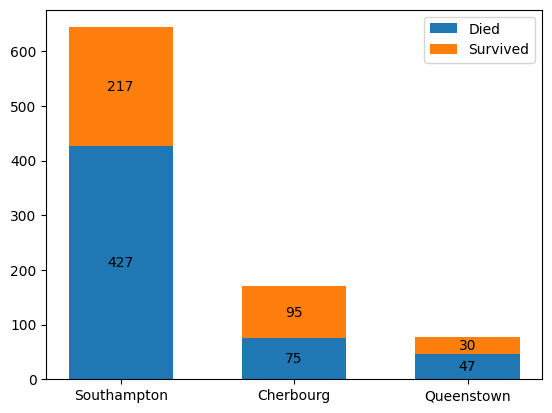

In [94]:
species = ("Southampton", "Cherbourg", "Queenstown")
counts = {
    "Died": np.array([427, 75, 47]),
    "Survived" : np.array([217,95, 30]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(3)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')

ax.legend()

plt.show()

In [95]:
(100/(427+217)) * 217
# Overall, 33.3 percent of those leaving Southampton survived

33.69565217391304

In [96]:
(100/(75+95)) * 95
# 55.8 percent of those who left Cherbourg overall survived

55.88235294117647

In [97]:
(100/(47+30)) * 30
# 38.9% of total Queenstown escapees survived

38.96103896103896

In [98]:
(100/(549+342)) * 217
# Of the total passengers leaving Southampton, 24.3 percent survived

24.354657687991022

In [99]:
(100/(549+342)) * 95
# Of the total passengers leaving Southampton, 10.6 percent survived

10.662177328843995

In [100]:
(100/(549+342)) * 30
# Of the total passengers leaving Southampton, 3.3% survived

3.367003367003367

In [101]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


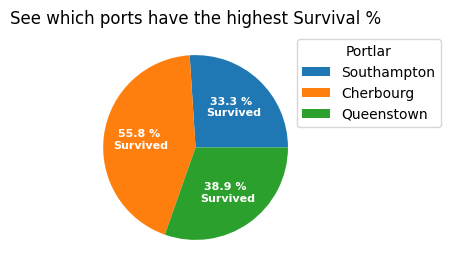

In [102]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["33.3 Southampton",
          "55.8 Cherbourg",
          "38.9 Queenstown"]

datat = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = np.round(pct/100.*np.sum(allvals),3)
    
    return  f"{absolute} % \nSurvived"


wedges, texts, autotexts = ax.pie(datat, autopct=lambda pct: func(pct, datat),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Portlar",
          loc="upper center",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("See which ports have the highest Survival %")

plt.show()

In [103]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> Let's see which class survived the most.

In [104]:
class_1_survived = data[(data["Pclass"]==1)]["Survived"].value_counts()
class_1_survived 

Survived
1    136
0     80
Name: count, dtype: int64

In [105]:
class_2_survived = data[(data["Pclass"]==2)]["Survived"].value_counts()
class_2_survived 

Survived
0    97
1    87
Name: count, dtype: int64

In [106]:
class_3_survived = data[(data["Pclass"]==3)]["Survived"].value_counts()
class_3_survived 

Survived
0    372
1    119
Name: count, dtype: int64

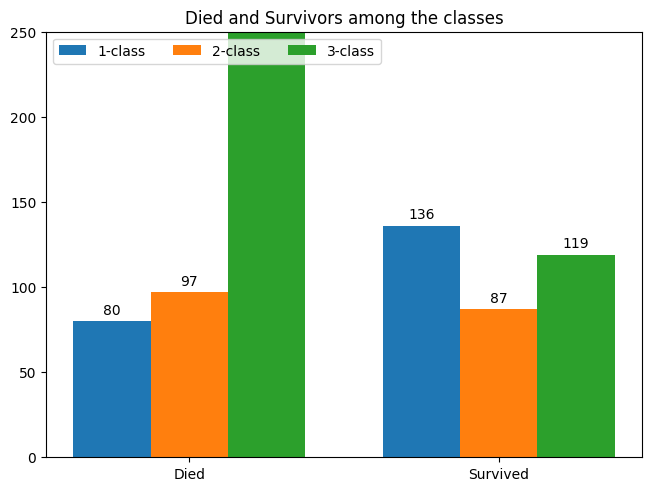

In [107]:
species = ("Died", "Survived")
penguin_means = {
    '1-class': (80,136),
    '2-class': (97,87),
    '3-class': (372,119),
}

x = np.arange(len(species))  
width = 0.25  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_title("Died and Survivors among the classes")
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [108]:
(100/(80+136)) * 136
# 62.9 percent of the total 1st class survived

62.96296296296296

In [109]:
(100/(97+87)) * 87
# 47.2 percent of the total 2nd class survived

47.28260869565217

In [110]:
(100/(372+119)) * 119
# 24.2 percent of the total 3rd class survived

24.23625254582485

In [111]:
(100/(549+342)) * 136
# Of the total passengers, 15.2% of 1st class passengers survived

15.26374859708193

In [112]:
(100/(549+342)) * 87
# Of the total passengers, 9.7% of those in 2nd class survived

9.764309764309765

In [113]:
(100/(549+342)) * 119
# 13.3% of 3rd class passengers survived

13.35578002244669

In [114]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> Let's see which one survives more than Sisters and Brothers.

In [115]:
class_sib0_survived = data[(data["SibSp"]==0)]["Survived"].value_counts()
class_sib0_survived 

Survived
0    398
1    210
Name: count, dtype: int64

In [116]:
class_sib1_survived = data[(data["SibSp"]==1)]["Survived"].value_counts()
class_sib1_survived 

Survived
1    112
0     97
Name: count, dtype: int64

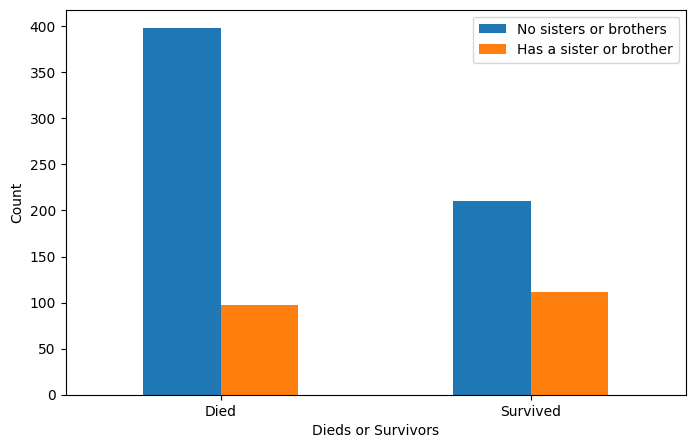

In [118]:
class_sib0_omon_qolganlar = [398, 210]
class_sib1_omon_qolganlar = [97, 112]


index = ["Died", "Survived"]

df = pd.DataFrame({'No sisters or brothers': class_sib0_omon_qolganlar,
                   "Has a sister or brother": class_sib1_omon_qolganlar}, index=index)

ax = df.plot.bar(rot=0, figsize=(8,5))
ax = plt.ylabel("Count")
ax = plt.xlabel("Dieds or Survivors")

In [119]:
(100/(398+210)) * 210
# Overall 34.5% of siblings survived

34.53947368421053

In [120]:
(100/(112+97)) * 112
# Overall 53.5% of those with siblings survived

53.588516746411486

In [121]:
(100/(549+342)) * 210
# Of the total passengers, 23.5 percent survived without siblings.

23.56902356902357

In [122]:
(100/(549+342)) * 112
# Of the total passengers, 12.5 percent of those with siblings survived

12.570145903479236

In [123]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> We will see which of those who have parents survived the most.

In [124]:
parents_0_omon_Survived = data[(data["Parch"]==0)]["Survived"].value_counts()
parents_0_omon_Survived 

Survived
0    445
1    233
Name: count, dtype: int64

In [125]:
parents_1_omon_Survived = data[(data["Parch"]==1)]["Survived"].value_counts()
parents_1_omon_Survived 

Survived
1    65
0    53
Name: count, dtype: int64

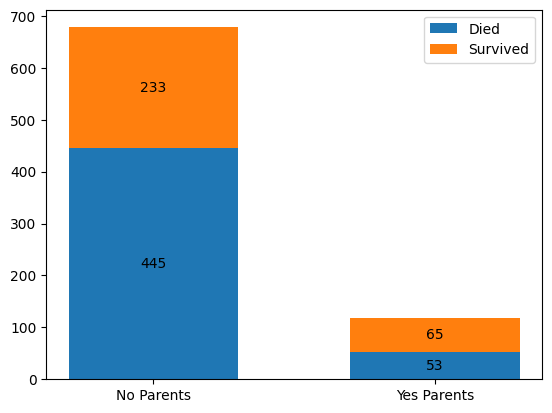

In [126]:

species = ("No Parents", "Yes Parents")
counts = {
    "Died": np.array([445, 53]),
    "Survived" : np.array([233, 65]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(2)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')


ax.legend()

plt.show()

In [127]:
(100/(445+233)) * 233
# 34.3 percent of those without parents survived

34.365781710914455

In [128]:
(100/(65+53)) * 53
# 44.9 percent of those who have parents survived

44.91525423728813

In [129]:
(100/(549+342)) * 233
# Among the general passengers, 26.1 percent of those without parents survived

26.150392817059483

In [130]:
(100/(549+342)) * 53
# Of the total passengers, 5.9 percent of those with parents survived

5.948372615039282

----------

In [131]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [132]:
data.info()
# Cabin has 693 NaN values and cannot be filled
# Therefore, we will delete this column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          731 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
data.drop("Cabin", axis=1, inplace=True)

In [134]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [135]:
data.dropna(inplace=True)
# Now we delete the NaN values in Age as well

In [136]:
data
# Now our total date is 731
# 160 data deleted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  731 non-null    int64  
 1   Survived     731 non-null    int64  
 2   Pclass       731 non-null    int64  
 3   Name         731 non-null    object 
 4   Sex          731 non-null    object 
 5   Age          731 non-null    float64
 6   SibSp        731 non-null    int64  
 7   Parch        731 non-null    int64  
 8   Ticket       731 non-null    object 
 9   Fare         731 non-null    float64
 10  Embarked     731 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 68.5+ KB


In [138]:
# We also delete the PassengerId column
data.drop("PassengerId", axis=1, inplace=True)

In [139]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [140]:
# We don't need the Name column to train the model, we delete it too
data.drop("Name", axis=1, inplace=True)

In [141]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder

# <center> Train

In [143]:
ordinal = OrdinalEncoder()
ordinal

OrdinalEncoder()

In [144]:
x_train = ordinal.fit(data.drop("Survived", axis=1))
x_train

OrdinalEncoder()

In [145]:
x_train = ordinal.transform(data.drop("Survived", axis=1))
x_train

array([[  2.,   1.,  28., ..., 417.,  16.,   2.],
       [  0.,   0.,  51., ..., 481., 181.,   0.],
       [  2.,   0.,  34., ..., 542.,  32.,   2.],
       ...,
       [  0.,   0.,  24., ...,  12., 131.,   2.],
       [  0.,   1.,  34., ...,   8., 131.,   0.],
       [  2.,   1.,  42., ..., 378.,  23.,   1.]])

In [146]:
x_train.shape

(731, 8)

In [147]:
y_train = np.array(data["Survived"])
y_train

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [148]:
ab = AdaBoostClassifier()

In [149]:
ab.fit(x_train, y_train)

AdaBoostClassifier()

# <center> Test

In [150]:
data2 = pd.read_csv("Datasets/test.csv")
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [151]:
data3 = pd.read_csv("Datasets/gender_submission.csv")
data3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [152]:
data3.drop("PassengerId", axis=1, inplace=True)

In [153]:
data2.insert(1,"Survived", np.array(data3), True)
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [154]:
data2.drop(["PassengerId", "Name", "Cabin"], axis=1, inplace=True)
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,NaN,0,0,359309,8.0500,S


In [155]:
data2.dropna(inplace=True)
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
409,1,3,female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1,1,female,37.0,1,0,19928,90.0000,Q
412,1,3,female,28.0,0,0,347086,7.7750,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C


In [156]:
x_test = ordinal.fit(data2.drop("Survived", axis=1))
x_test

OrdinalEncoder()

In [157]:
x_test = ordinal.transform(data2.drop("Survived", axis=1))
x_test

array([[  2.,   1.,  44., ..., 128.,  20.,   1.],
       [  2.,   0.,  60., ..., 181.,   4.,   2.],
       [  1.,   1.,  73., ...,  63.,  34.,   1.],
       ...,
       [  2.,   0.,  35., ..., 150.,  17.,   2.],
       [  0.,   0.,  51., ..., 251., 133.,   0.],
       [  2.,   1.,  50., ..., 270.,   8.,   2.]])

In [158]:
y_test = np.array(data2["Survived"])
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [159]:
pct1 = ab.score(x_test, y_test)
pct1


0.9305135951661632

In [198]:
print("Accuracy ", np.round(pct1, 2), "% ")

Accuracy  0.93 % 


## <center> Now we will try to read only columns with high correlation.

# <center> Train

In [161]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [162]:
# To see the correlation, we can make all the data numeric
data_copy = data.copy()
data_copy['Sex']=data_copy['Sex'].astype('category').cat.codes
data_copy['Ticket']=data_copy['Ticket'].astype('category').cat.codes
data_copy['Embarked']=data_copy['Embarked'].astype('category').cat.codes
data_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,417,7.2500,2
1,1,1,0,38.0,1,0,481,71.2833,0
2,1,3,0,26.0,0,0,542,7.9250,2
3,1,1,0,35.0,1,0,40,53.1000,2
4,0,3,1,35.0,0,0,380,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,385,29.1250,1
886,0,2,1,27.0,0,0,84,13.0000,2
887,1,1,0,19.0,0,0,12,30.0000,2
889,1,1,1,26.0,0,0,8,30.0000,0


<Axes: >

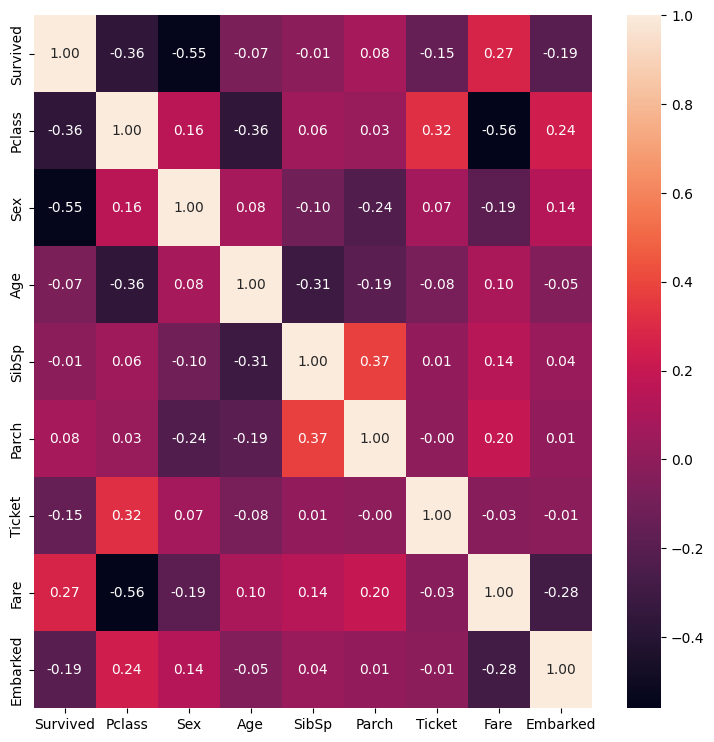

In [163]:
plt.subplots(figsize=(9,9))
sn.heatmap(data_copy.corr(numeric_only=True),annot=True, fmt='.2f')

In [164]:
data_copy.corrwith(data_copy["Survived"], numeric_only=True).sort_values()
# So we'll get on Survived
# We decided to take columns Sex, Pclass, Fare, Embarked, Ticekt, SibSp, Parch

Sex        -0.545370
Pclass     -0.361531
Embarked   -0.194619
Ticket     -0.147765
Age        -0.068832
SibSp      -0.013154
Parch       0.084448
Fare        0.272165
Survived    1.000000
dtype: float64

In [165]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [166]:
x_train2 = ordinal.fit(data.drop(["Survived", "Age"], axis=1))
x_train2
# Sex, Pclass, Fare, Embarked, Ticket, SibSp, Parch

OrdinalEncoder()

In [167]:
x_train2 = ordinal.transform(data.drop(["Survived", "Age"], axis=1))
x_train2

array([[  2.,   1.,   1., ..., 417.,  16.,   2.],
       [  0.,   0.,   1., ..., 481., 181.,   0.],
       [  2.,   0.,   0., ..., 542.,  32.,   2.],
       ...,
       [  0.,   0.,   0., ...,  12., 131.,   2.],
       [  0.,   1.,   0., ...,   8., 131.,   0.],
       [  2.,   1.,   0., ..., 378.,  23.,   1.]])

In [168]:
x_train2.shape

(731, 7)

In [169]:
y_train2 = np.array(data["Survived"])
y_train2

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [170]:
ab = AdaBoostClassifier()

In [171]:
ab.fit(x_train2, y_train2)

AdaBoostClassifier()

# <center> Test

In [172]:
data2 = pd.read_csv("Datasets/test.csv")
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [173]:
data3 = pd.read_csv("Datasets/gender_submission.csv")
data3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [174]:
data3.drop("PassengerId", axis=1, inplace=True)

In [175]:
data2.insert(1,"Survived", np.array(data3), True)
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [176]:
data2.drop(["Name", "Cabin"], axis=1, inplace=True)
data2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,NaN,0,0,359309,8.0500,S


In [177]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [178]:
data2[data2["Fare"].isna()]
# There is one NaN value in the mouse column and it needs to be filled

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,0,3,male,60.5,0,0,3701,NaN,S


In [179]:
data_1044 = data2[(data2["Sex"]=="male") & (data2["Pclass"]==3) & (data2["Embarked"]=="S") & (data2["Parch"]==0) & (data2["SibSp"]==0)]
data_1044


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
3,895,0,3,male,27.0,0,0,315154,8.6625,S
5,897,0,3,male,14.0,0,0,7538,9.2250,S
10,902,0,3,male,NaN,0,0,349220,7.8958,S
38,930,0,3,male,25.0,0,0,345768,9.5000,S
39,931,0,3,male,NaN,0,0,1601,56.4958,S
...,...,...,...,...,...,...,...,...,...,...
386,1278,0,3,male,24.0,0,0,349911,7.7750,S
398,1290,0,3,male,22.0,0,0,347065,7.7750,S
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S


In [180]:
data_1044 = np.array(data_1044["Fare"])
data_1044

array([ 8.6625,  9.225 ,  7.8958,  9.5   , 56.4958,  7.85  ,  7.925 ,
        7.8958,  7.65  ,  7.8958,  7.75  ,  7.8958,  8.05  ,  7.8958,
        7.775 ,  8.05  ,  7.7958,  7.925 ,  8.05  ,  7.775 , 22.525 ,
        8.7125,  7.25  ,  7.7958,  8.05  ,  8.05  ,  7.8958,  7.8542,
        8.05  ,     nan,  7.55  ,  7.    ,  7.55  ,  7.8542,  7.8958,
       22.525 ,  7.05  ,  8.05  ,  8.05  ,  7.7958,  7.7958, 15.1   ,
        7.8542,  7.8875,  7.925 ,  9.325 ,  9.5   ,  7.55  ,  8.05  ,
        7.775 ,  7.8542,  7.8958,  7.55  ,  8.6625,  7.25  ,  7.25  ,
        8.05  ,  9.5   ,  7.8958,  7.8542,  7.775 ,  8.6625,  8.6625,
        7.575 ,  7.8542,  7.775 ,  7.05  ,  7.8958,  7.5792,  7.8792,
        8.6625,  7.775 ,  7.775 ,  8.05  ,  7.25  ,  8.05  ])

In [181]:
np.nansum(data_1044)/len(data_1044)

8.977080263157893

In [182]:
data2.iloc[152, 8] = 8.977

In [183]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [184]:
data2.drop(["Age"], axis=1, inplace=True)
data2

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,0,0,330911,7.8292,Q
1,893,1,3,female,1,0,363272,7.0000,S
2,894,0,2,male,0,0,240276,9.6875,Q
3,895,0,3,male,0,0,315154,8.6625,S
4,896,1,3,female,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,0,0,A.5. 3236,8.0500,S
414,1306,1,1,female,0,0,PC 17758,108.9000,C
415,1307,0,3,male,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,0,0,359309,8.0500,S


In [185]:
data2.dropna(inplace=True)
data2

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,0,0,330911,7.8292,Q
1,893,1,3,female,1,0,363272,7.0000,S
2,894,0,2,male,0,0,240276,9.6875,Q
3,895,0,3,male,0,0,315154,8.6625,S
4,896,1,3,female,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,0,0,A.5. 3236,8.0500,S
414,1306,1,1,female,0,0,PC 17758,108.9000,C
415,1307,0,3,male,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,0,0,359309,8.0500,S


In [186]:
ps_index = np.array(data2["PassengerId"])
ps_index

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [187]:
x_test2 = ordinal.fit(data2.drop(["PassengerId", "Survived"], axis=1))
x_test2

OrdinalEncoder()

In [188]:
x_test2 = ordinal.transform(data2.drop(["PassengerId", "Survived"], axis=1))
x_test2

array([[  2.,   1.,   0., ..., 152.,  24.,   1.],
       [  2.,   0.,   1., ..., 221.,   5.,   2.],
       [  1.,   1.,   0., ...,  73.,  42.,   1.],
       ...,
       [  2.,   1.,   0., ..., 346.,   9.,   2.],
       [  2.,   1.,   0., ..., 220.,  31.,   2.],
       [  2.,   1.,   1., ..., 105.,  85.,   0.]])

In [189]:
y_test2 = np.array(data2["Survived"])
y_test2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [190]:
pct2 = ab.score(x_test2, y_test2)
pct2

0.9401913875598086

In [193]:
print("When we only trained highly correlated columns, the accuracy was ", np.round(pct2, 2), "% ")


When we only trained highly correlated columns, the accuracy was  0.94 % 


In [194]:
sub = ab.predict(x_test2)
sub

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [195]:
d = {'PassengerId': ps_index, 'Survived': sub}
df = pd.DataFrame(data=d)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [196]:
#df.to_csv("Datasets/submissionfile.csv", index=False)

# <center> <h1> 👨‍💻   🚀  